In [1]:
import scanpy as sc 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import bbknn
import scipy
import scipy.stats as stats
# sc.settings.set_figure_params(figsize=(5,4)) 
sc.settings.verbosity = 0 
sc.settings.set_figure_params(dpi_save=400, facecolor='white', fontsize=7, format='jpg')

In [2]:
adata = sc.read_h5ad('../data/v4-sub-fib.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 28134 × 3000
    obs: 'sample', 'sample_batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_poly'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_poly_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
val = []
for x in list(adata.obs['sample']):
    if x.startswith('AF'):
        val.append('AF')
    else:
        val.append('NAF')
adata.obs['sample_group'] = np.array(val)

In [5]:
def box_ckw_plt(gene, adata,raw=True):
    if raw:
        adata = adata.raw.to_adata()
    if isinstance(gene,str):

        AF_x = np.array(adata[adata.obs['sample_group']=='AF'].to_df().loc[:,gene])
        NAF_x = np.array(adata[adata.obs['sample_group']=='NAF'].to_df().loc[:,gene])
        AF = pd.DataFrame()
        AF['sample'] = np.repeat('AF', AF_x.shape)
        AF[gene] = AF_x
        NAF = pd.DataFrame()
        NAF['sample'] = np.repeat('NAF', NAF_x.shape)
        NAF[gene] = NAF_x
        df = pd.concat([AF,NAF])
        fig = plt.figure()
        p = stats.ttest_ind(a=df[df.loc[:,'sample']=='AF'].iloc[:,-1],
                         b=df[df.loc[:,'sample']=='NAF'].iloc[:,-1],
                         equal_var=True,alternative='two-sided')[-1]
        sns.boxplot(x='sample', y=gene,
                      data=df,
                   )
        if p <0.001:
            t = 'P<0.001'
            plt.title(t+ '   '+str(p))
        else:
            plt.title('p='+str(p))
        plt.grid()
        plt.savefig('./figures/box/{}_boxplot.jpg'.format(gene),dpi=400)
    else:
        tol = gene
        for gene in tol:
              
                AF_x = np.array(adata[adata.obs['sample_group']=='AF'].to_df().loc[:,gene])
                NAF_x = np.array(adata[adata.obs['sample_group']=='NAF'].to_df().loc[:,gene])
                AF = pd.DataFrame()
                AF['sample'] = np.repeat('AF', AF_x.shape)
                AF[gene] = AF_x
                NAF = pd.DataFrame()
                NAF['sample'] = np.repeat('NAF', NAF_x.shape)
                NAF[gene] = NAF_x
                df = pd.concat([AF,NAF])
                fig = plt.figure()
                p = stats.ttest_ind(a=df[df.loc[:,'sample']=='AF'].iloc[:,-1],
                                 b=df[df.loc[:,'sample']=='NAF'].iloc[:,-1],
                                 equal_var=True,alternative='two-sided')[-1]
                sns.boxplot(x='sample', y=gene,
                              data=df,
                           )
                if p <0.001:
                    t = 'P<0.001'
                    plt.title(t+ '   '+str(p))
                else:
                    plt.title('p='+str(p))
                plt.grid()
                plt.savefig('./figures/box/{}_boxplot.jpg'.format(gene),dpi=400)

In [6]:
CXCl = ['CXCL12', 'CXCR4','ACKR3']
FGF = ['FGF7', 'FGF10', 'FGFR1','CCN2']

ncWNT =  ['WNT5B', 'WNT11', 'FZD1', 'FZD4']
Ten = ['TNC', 'TNXB', 'SDC1', 'ITGA8', 'ITGA9', 'ITGB1']
TGFb = [ 'TGFB1', 'TGFB2', 'TGFBR1', 'ACVR1', 'TGFBR2','CCN2']
dic = {'CXCL':CXCl, 'FGF':FGF, 'ncWNT':ncWNT, 'Ten':Ten, 'TGFb':TGFb}

/var/folders/0q/0x0df50j27b1w78yn0n106jc0000gp/T/ipykernel_23657/3205085316.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


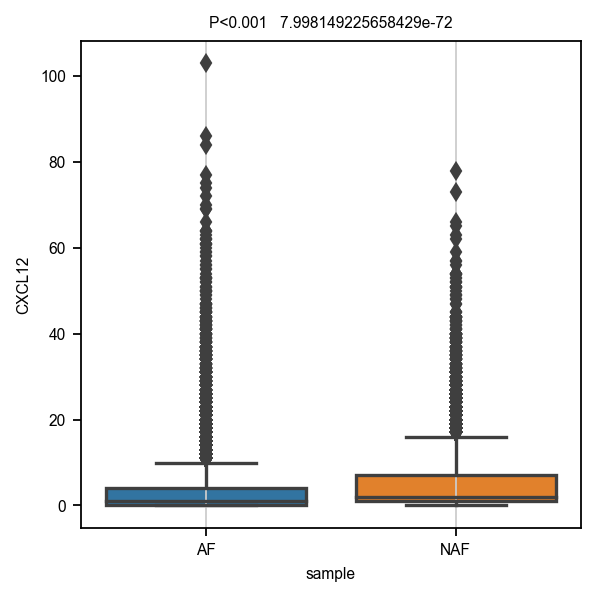

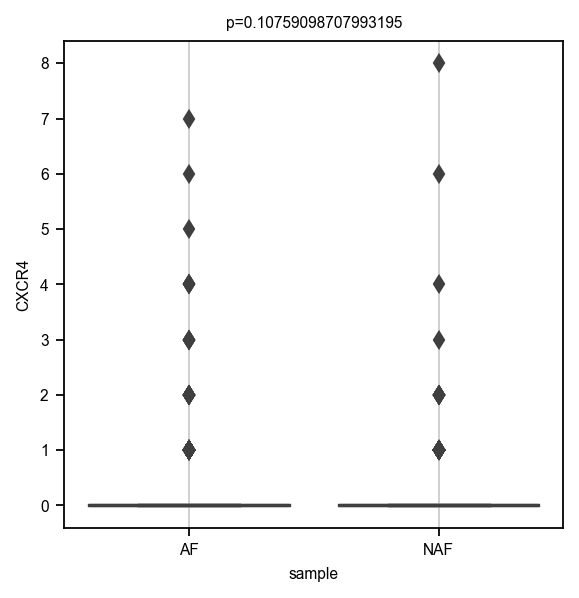

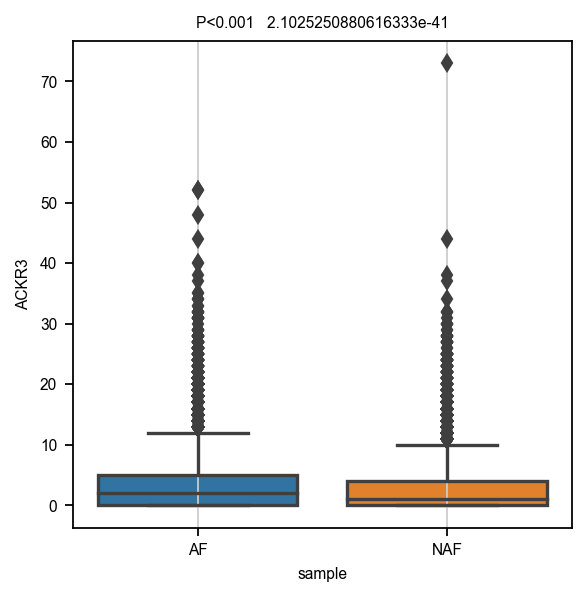

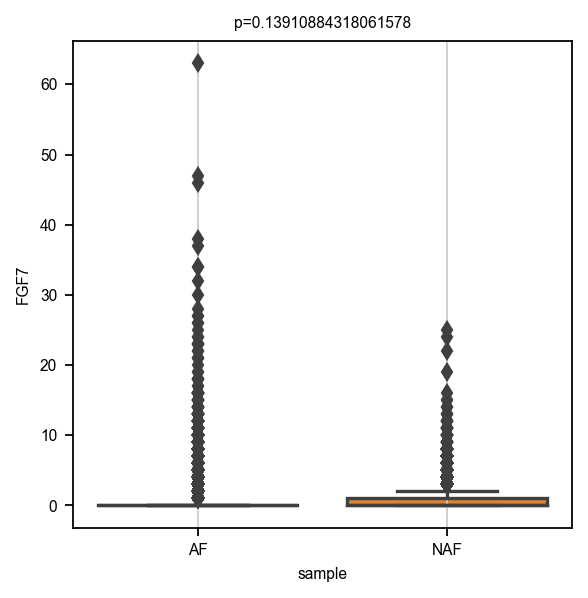

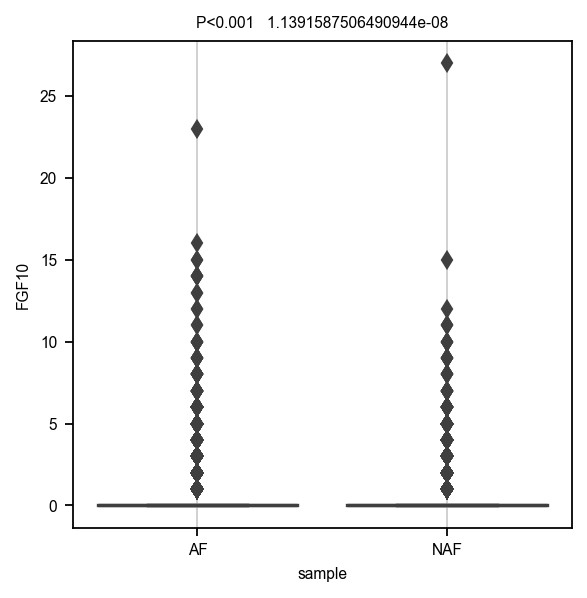

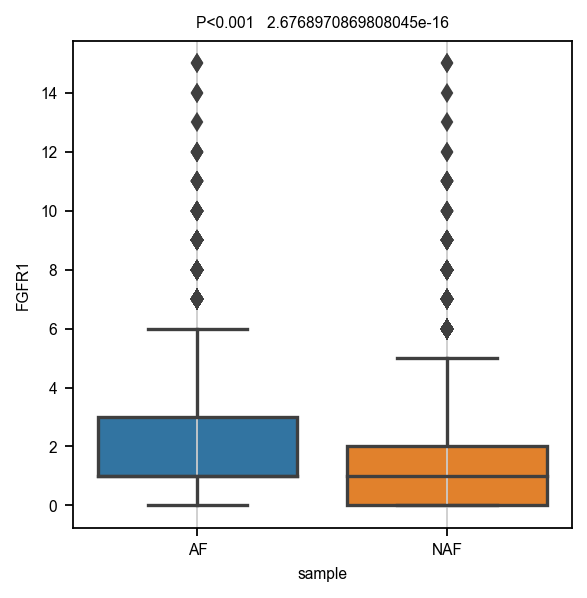

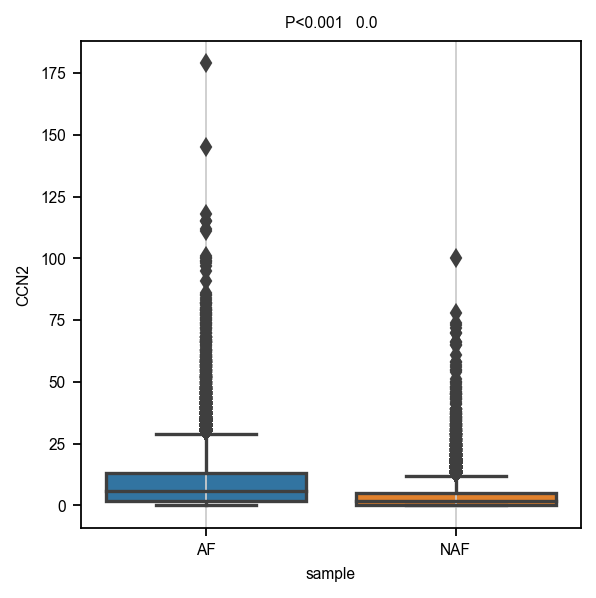

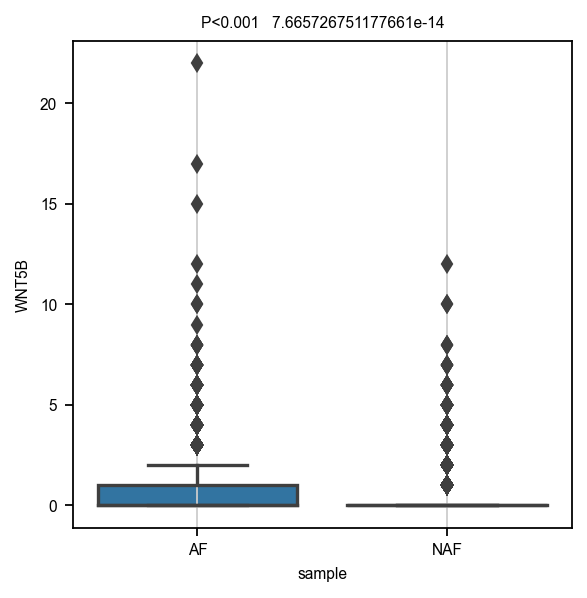

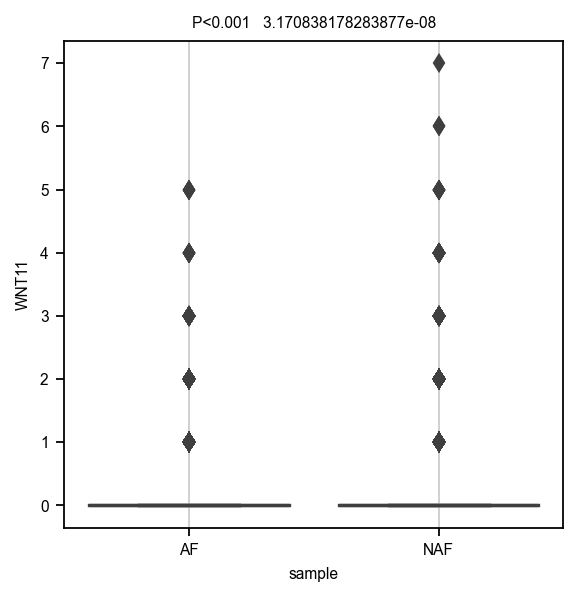

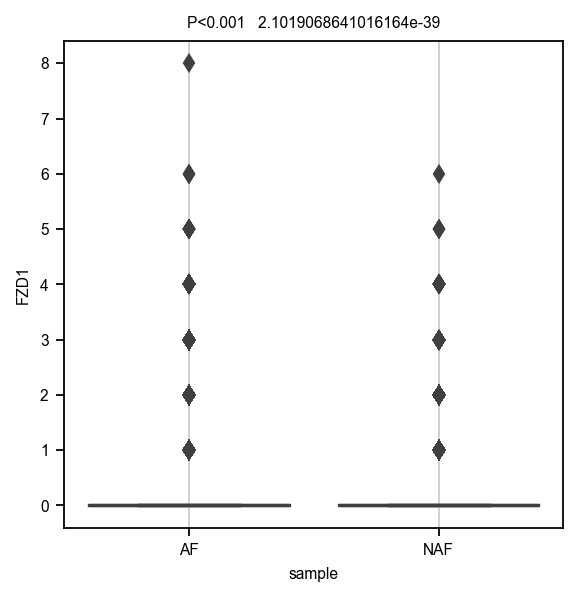

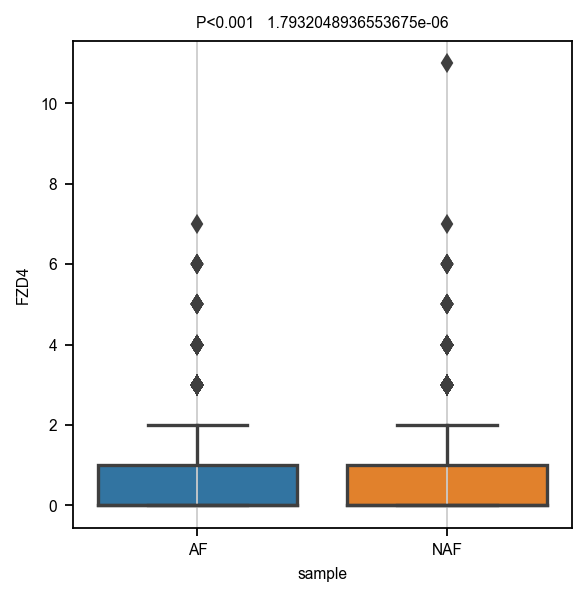

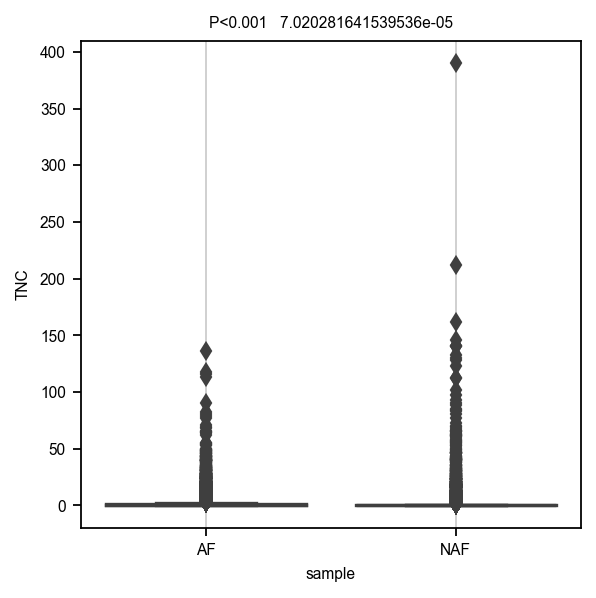

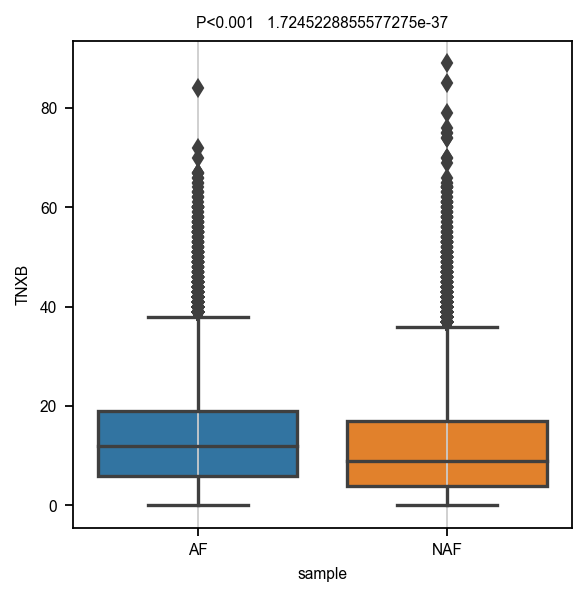

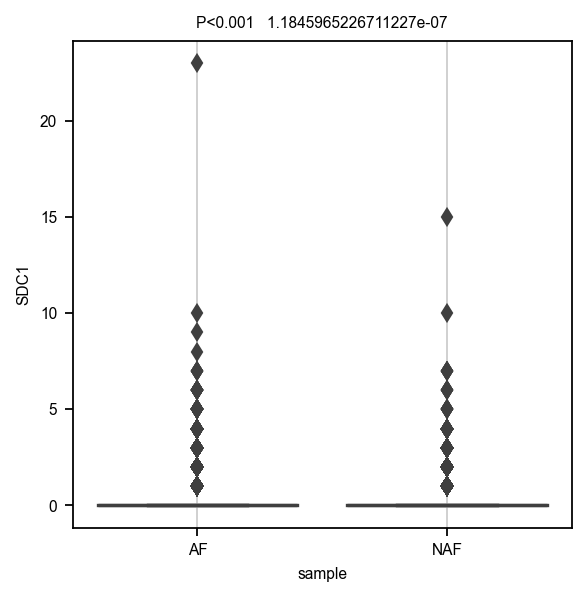

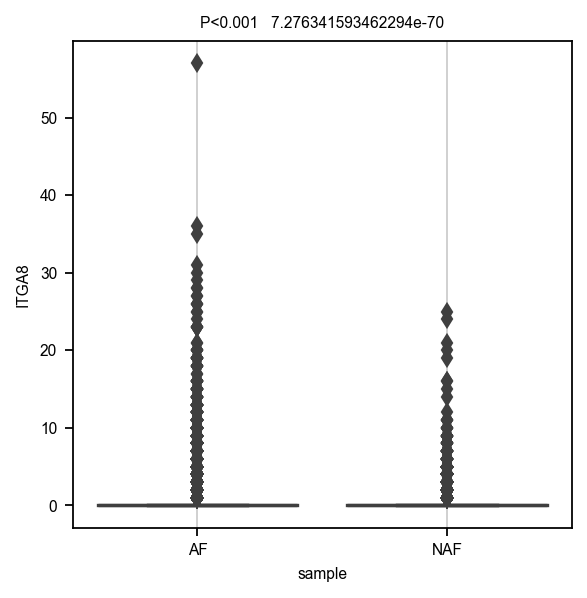

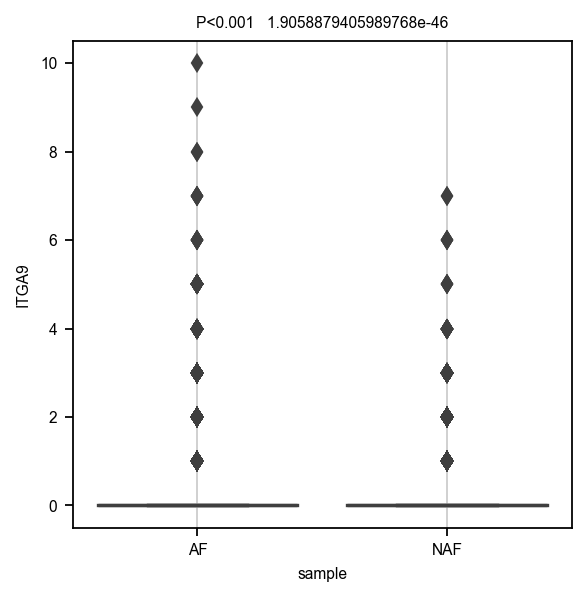

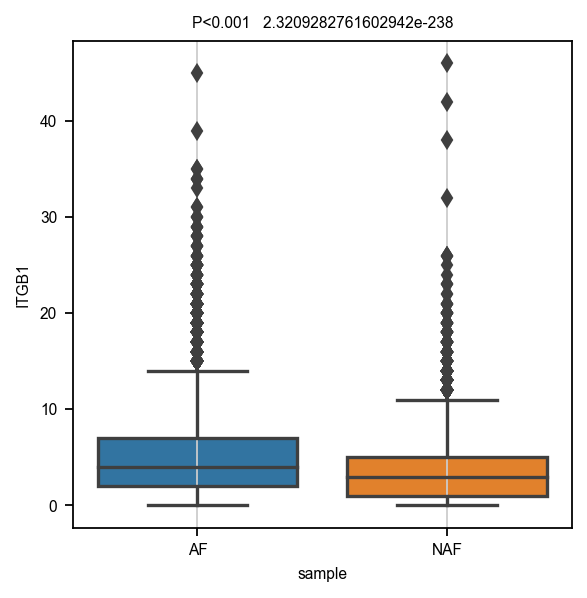

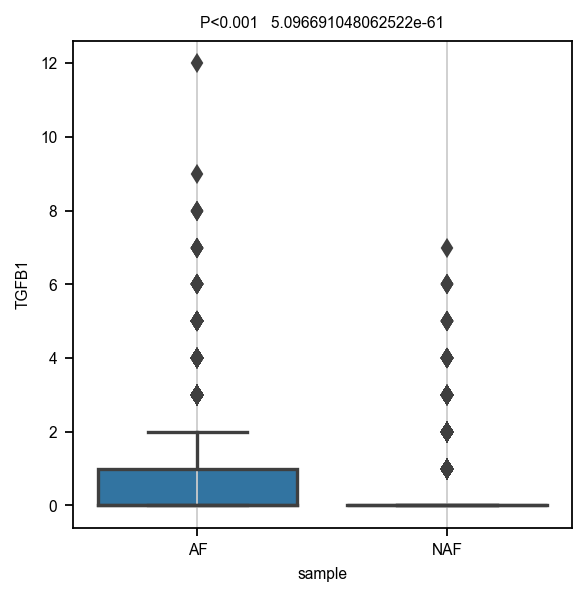

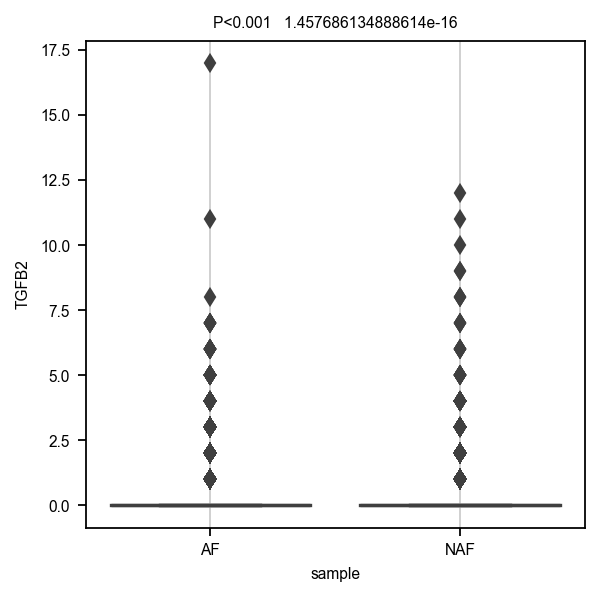

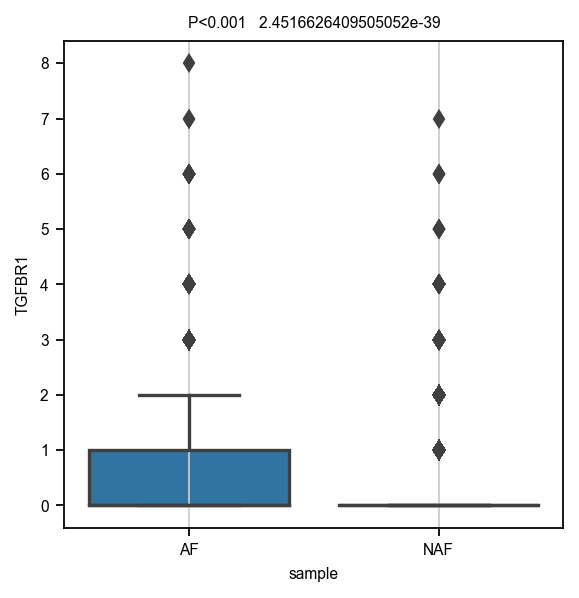

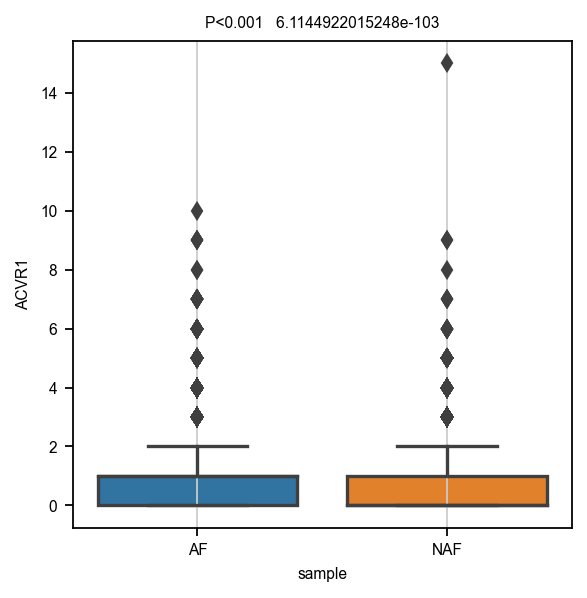

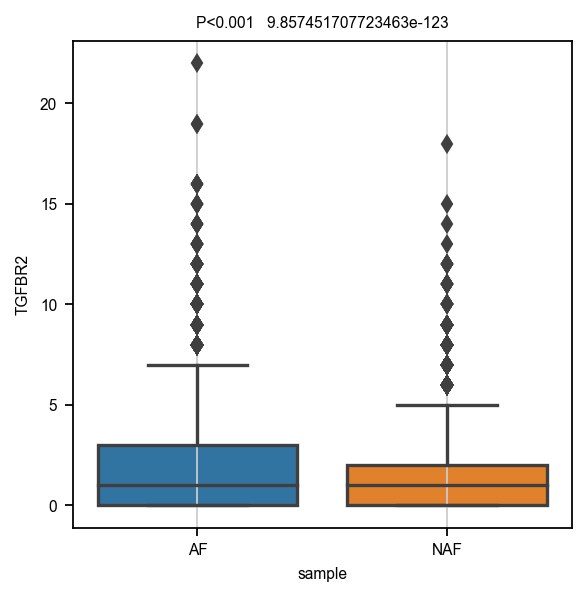

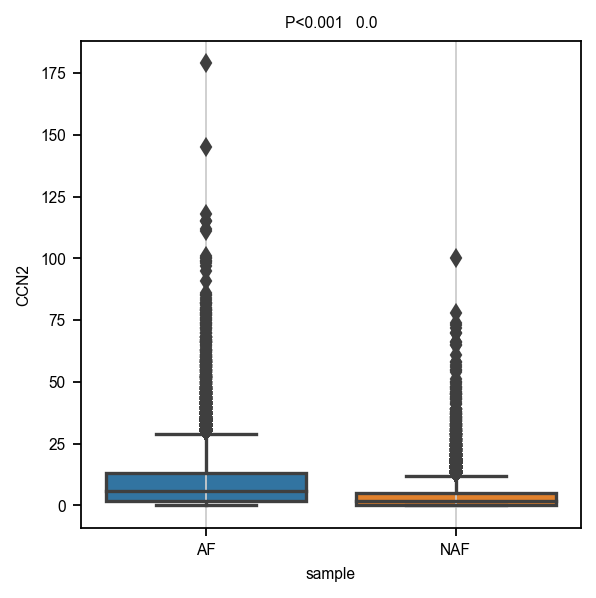

In [8]:
for k in dic.keys():
    box_ckw_plt(dic[k],adata)

In [7]:
from sklearn.preprocessing import scale

In [19]:
def bar_ckw_plot(tol,adata, raw=True):
    if raw:
        adata = adata.raw.to_adata()
    for gene in tol:
        
        AF_x = np.array(adata[adata.obs['sample_group']=='AF'].to_df().loc[:,gene])
    

        NAF_x = np.array(adata[adata.obs['sample_group']=='NAF'].to_df().loc[:,gene])


        AF = pd.DataFrame()
        AF['sample'] = np.repeat('AF', AF_x.shape)
        AF[gene] = AF_x
        NAF = pd.DataFrame()
        NAF['sample'] = np.repeat('NAF', NAF_x.shape)
        NAF[gene] = NAF_x
        df = pd.concat([NAF,AF])
        fig = plt.figure()
        new = df.groupby('sample').mean()
#         print(new)?
#         print(new)
        ticks=[1,1.11]
        for i in range(2):
            plt.bar(x=ticks[np.absolute(i-1)],height=new.iloc[i,:],width=0.1)
        plt.xticks([1,1.11],['NAF','AF'], size=10)
        plt.yticks(size=10)
        plt.ylabel(gene)

        p = stats.ttest_ind(a=df[df.loc[:,'sample']=='AF'].iloc[:,-1],
                         b=df[df.loc[:,'sample']=='NAF'].iloc[:,-1],
                         equal_var=True,alternative='two-sided')[-1]
#         plt.ylim([0,1])

#         plt.annotate(text='P={}'.format(p), xy=(1.01,1.9),)
        # sns.boxplot(x='sample', y=gene,
        #               data=df,
        #            )
        if p>0.0001:
            plt.title('P='+str(p))
        else:
            plt.title('P<0.0001')
        plt.grid()
        plt.savefig('./figures/bar/{}_barplot.jpg'.format(gene),dpi=400)
#         break

/var/folders/0q/0x0df50j27b1w78yn0n106jc0000gp/T/ipykernel_24473/1955163341.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


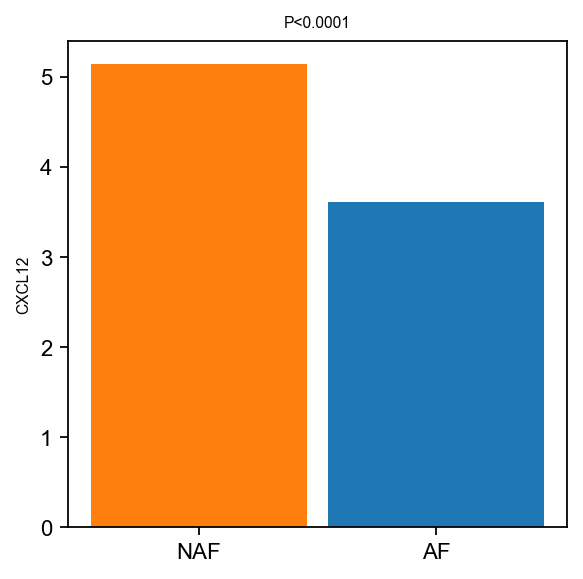

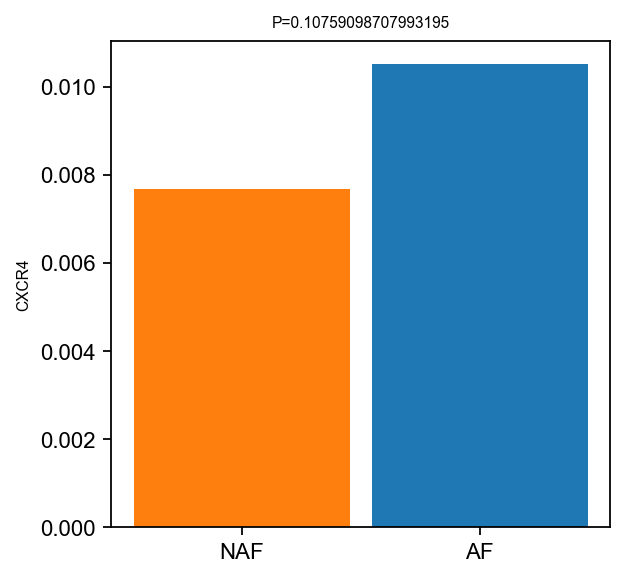

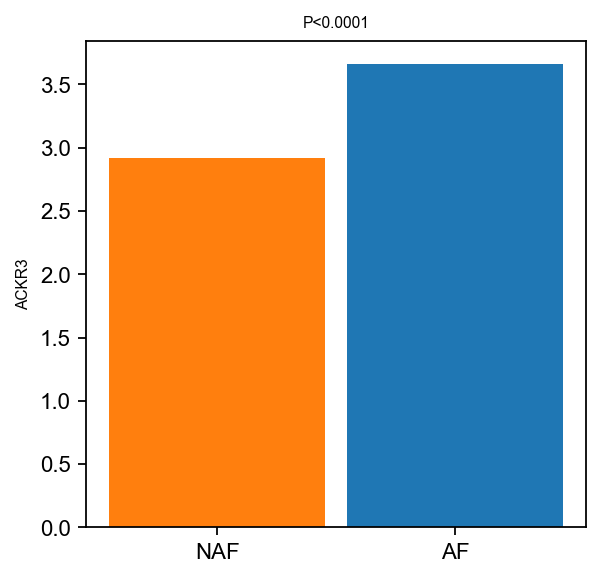

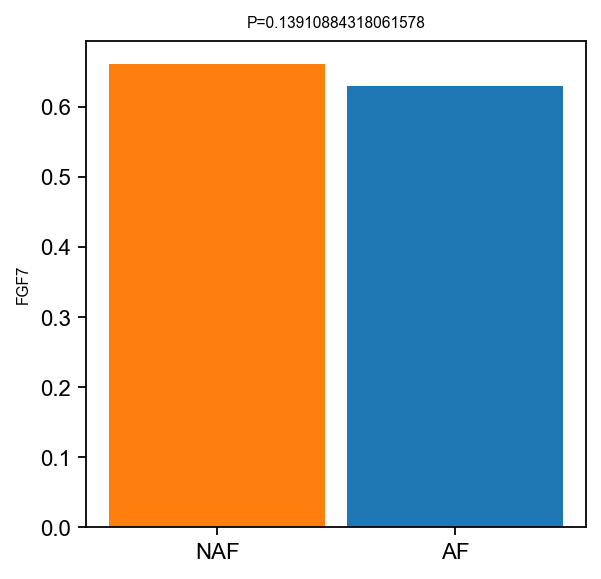

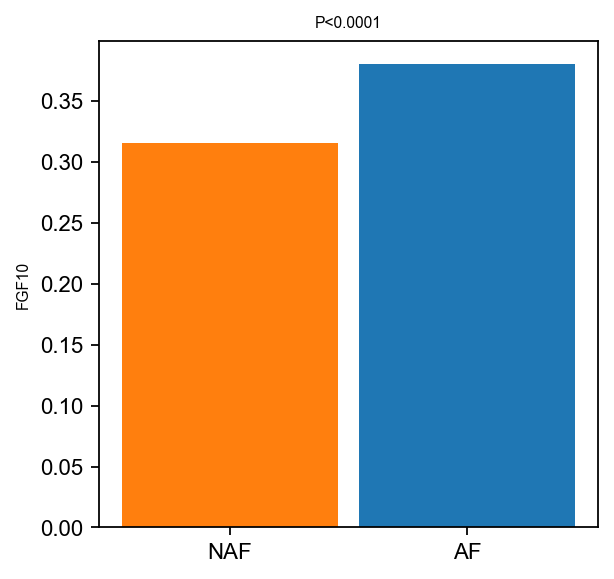

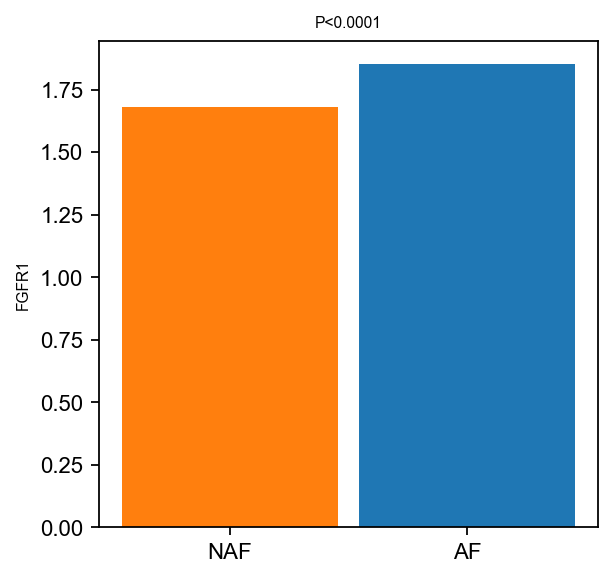

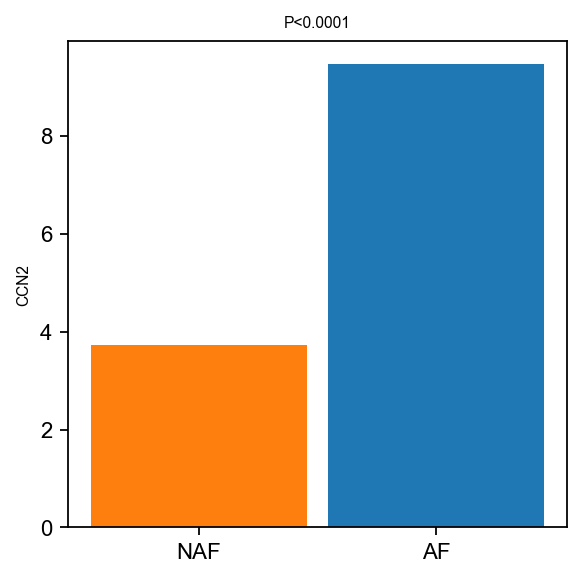

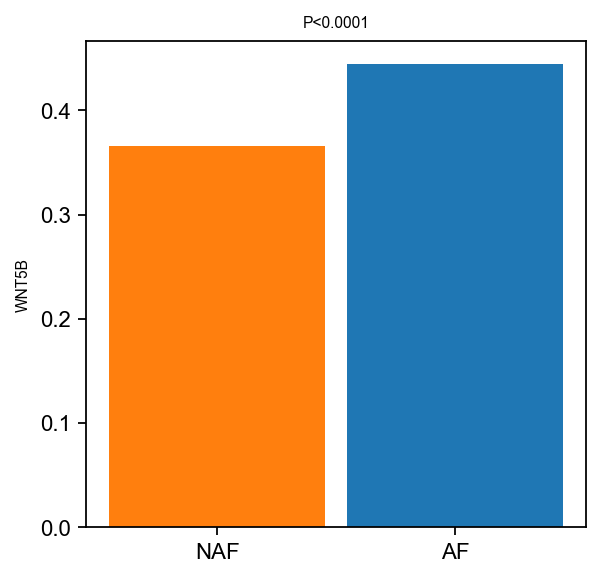

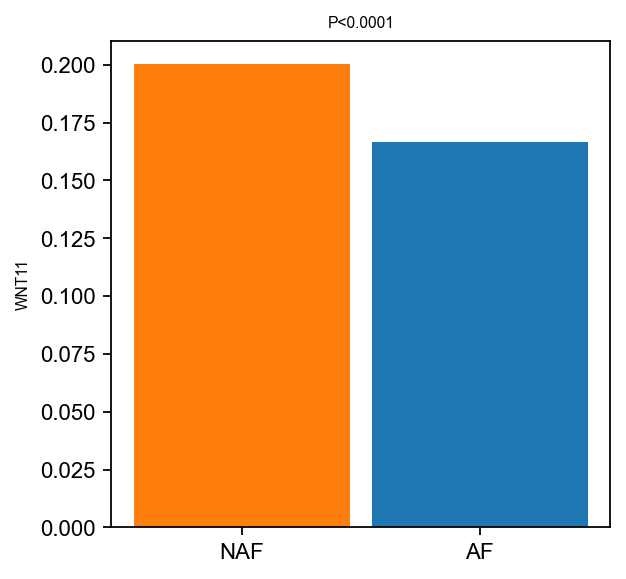

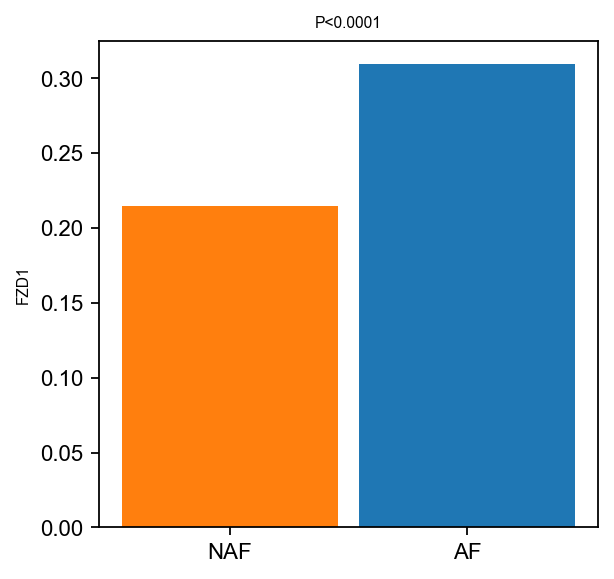

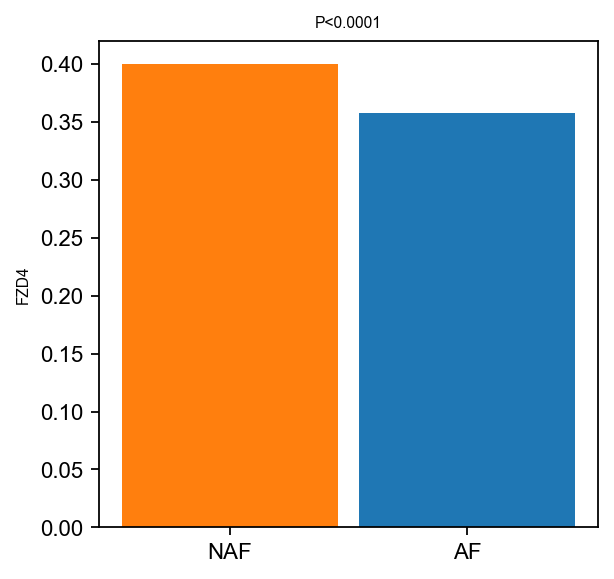

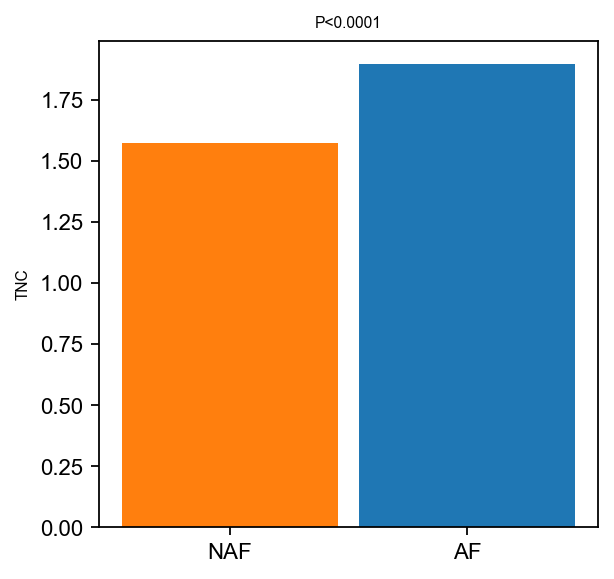

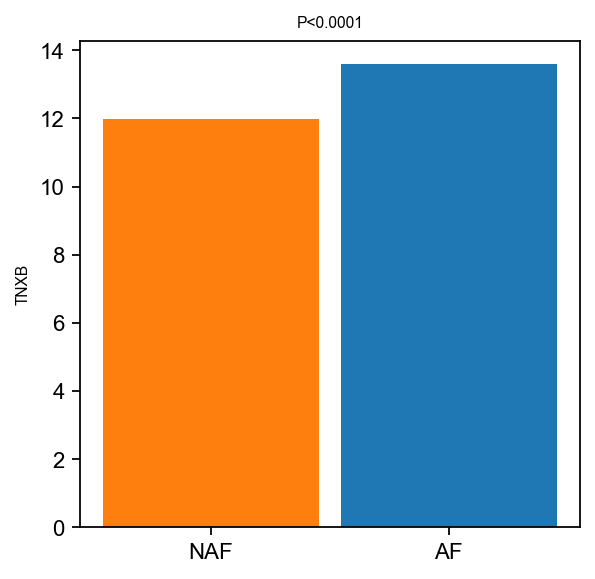

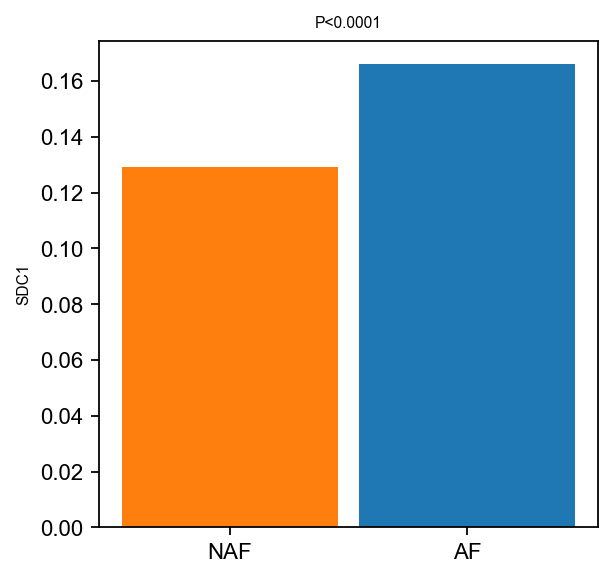

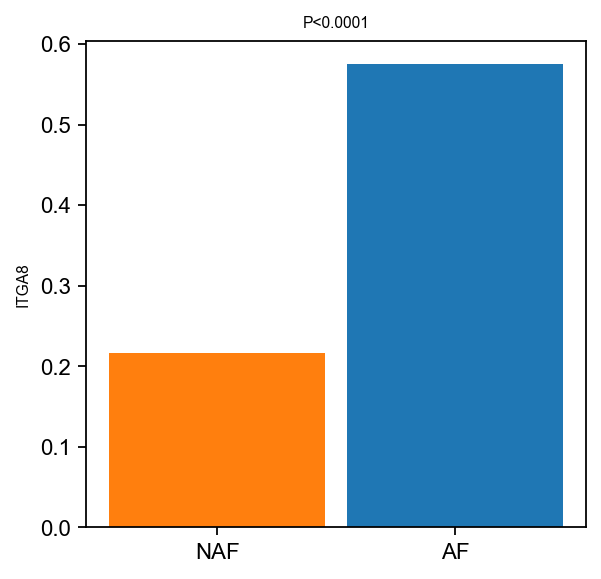

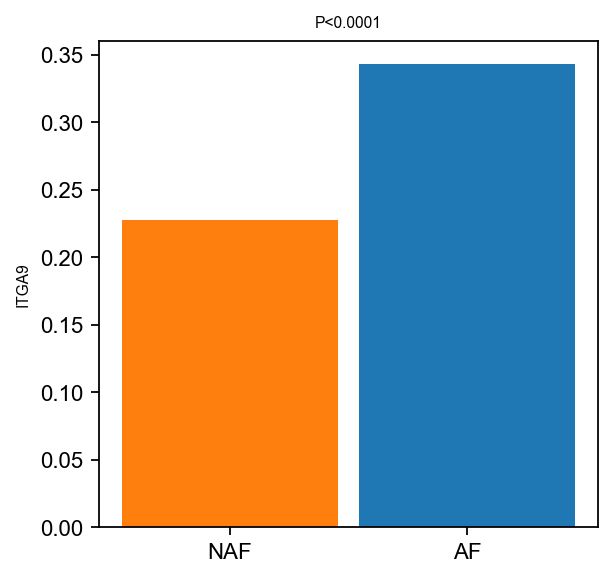

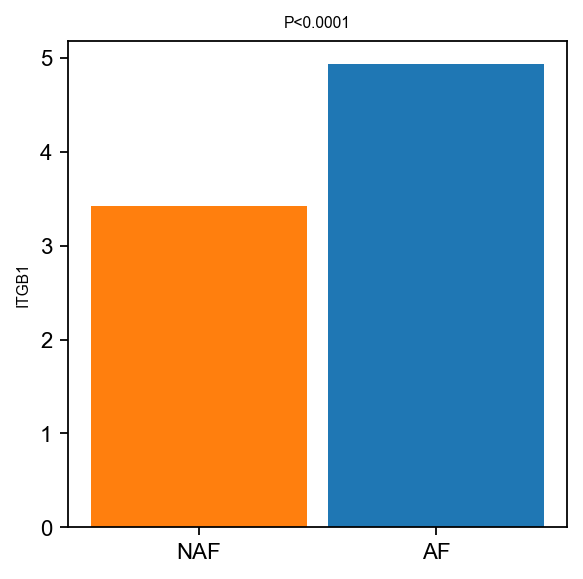

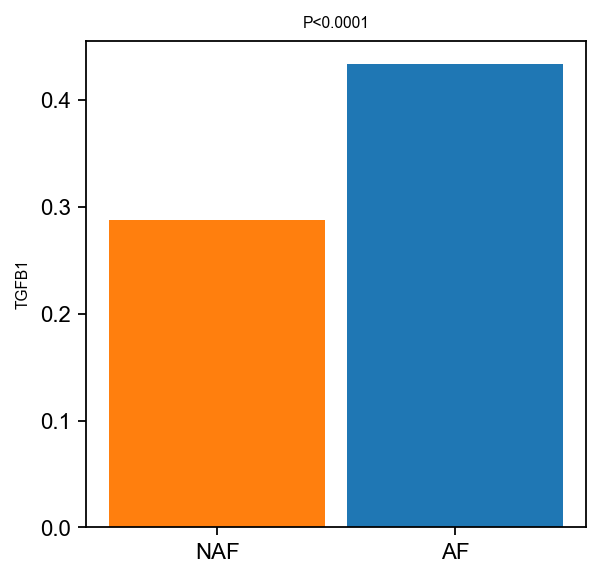

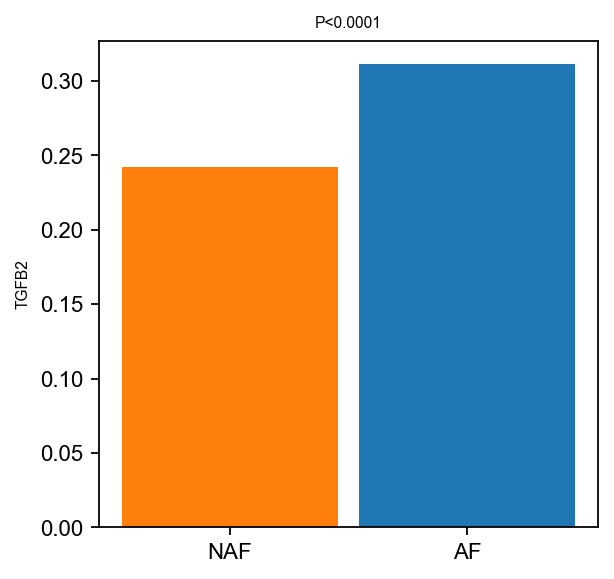

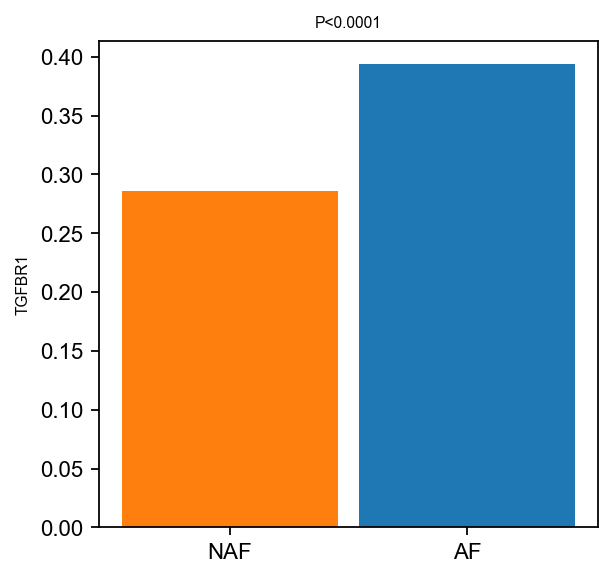

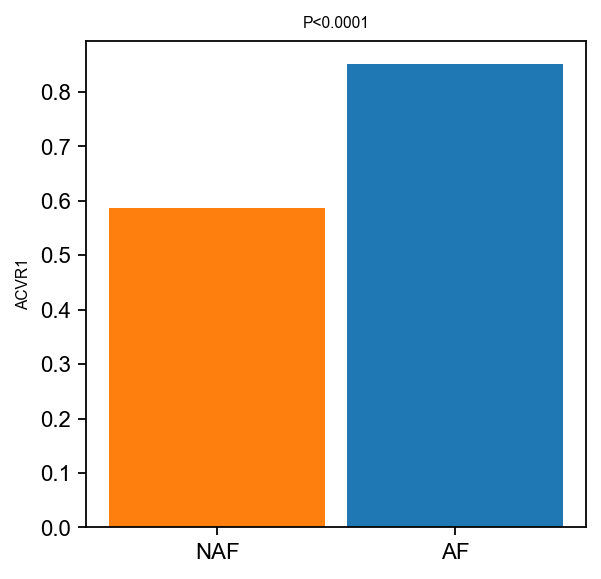

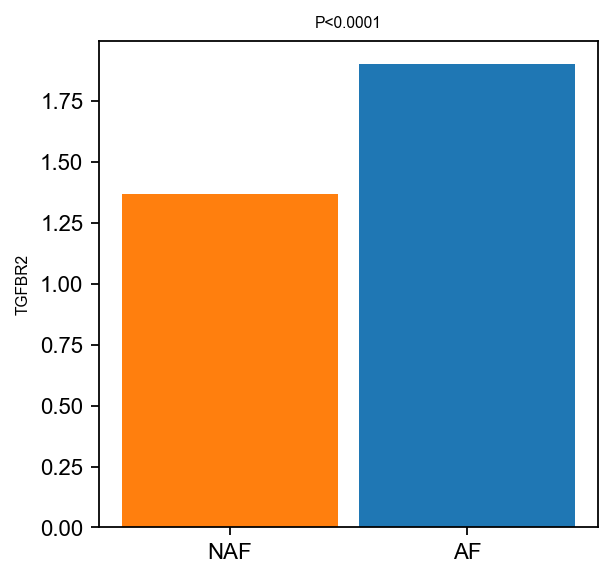

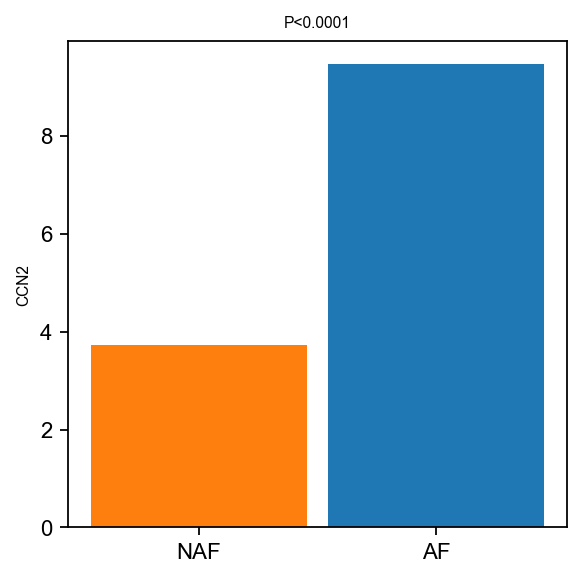

In [20]:
for k in dic.keys():
    bar_ckw_plot(dic[k],adata)
#     break